<a href="https://colab.research.google.com/github/Maria-Sanjana/SIT723-ResearchProject_A_Maria/blob/main/ctg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from sklearn.utils import resample

In [37]:
#Loading the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('ctg.csv')

Saving ctg.csv to ctg (1).csv


In [38]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,01-12-1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,03-05-1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,03-05-1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,03-05-1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [39]:
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [40]:
df = df.drop(['FileName','Date','SegFile','Width', 'Min','Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance','Tendency'], axis=1)

In [41]:
df.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [42]:
df.isnull().sum()

b        4
e        4
LBE      4
LB       4
AC       4
FM       3
UC       3
ASTV     3
MSTV     3
ALTV     3
MLTV     3
DL       2
DS       2
DP       2
DR       2
A        4
B        4
C        4
D        4
E        4
AD       4
DE       4
LD       4
FS       4
SUSP     4
CLASS    4
NSP      4
dtype: int64

In [43]:
df=df.dropna()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       2126 non-null   float64
 1   e       2126 non-null   float64
 2   LBE     2126 non-null   float64
 3   LB      2126 non-null   float64
 4   AC      2126 non-null   float64
 5   FM      2126 non-null   float64
 6   UC      2126 non-null   float64
 7   ASTV    2126 non-null   float64
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   float64
 10  MLTV    2126 non-null   float64
 11  DL      2126 non-null   float64
 12  DS      2126 non-null   float64
 13  DP      2126 non-null   float64
 14  DR      2126 non-null   float64
 15  A       2126 non-null   float64
 16  B       2126 non-null   float64
 17  C       2126 non-null   float64
 18  D       2126 non-null   float64
 19  E       2126 non-null   float64
 20  AD      2126 non-null   float64
 21  DE      2126 non-null   float64
 22  

In [45]:
df['NSP'] = np.where(df['NSP'] == 1, 0, 1)

In [46]:
df['NSP'].value_counts()

0    1655
1     471
Name: NSP, dtype: int64

In [47]:
label_0 = df[df['NSP']==0]
label_1 = df[df['NSP']==1]

In [48]:
new_label = resample(label_1, replace = True, n_samples = 500) 
len(new_label)

500

In [49]:
sample_data=pd.concat([label_0, new_label])


In [50]:
sample_data = sample_data.sample(frac = 1)
sample_data.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
678,373.0,1045.0,140.0,140.0,9.0,0.0,0.0,56.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0
1829,168.0,1154.0,140.0,140.0,0.0,1.0,3.0,61.0,1.3,0.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0
795,1473.0,3599.0,146.0,146.0,1.0,0.0,12.0,49.0,0.9,32.0,8.7,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1072,1067.0,1968.0,133.0,133.0,1.0,0.0,6.0,27.0,1.7,13.0,11.4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0
1462,2137.0,3319.0,148.0,148.0,0.0,0.0,6.0,50.0,0.5,60.0,4.9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [51]:
df['NSP'].head()

1    1
2    0
3    0
4    0
5    0
Name: NSP, dtype: int64

In [52]:

#separating the labels
data = sample_data.iloc[:,:-1].values
labels = sample_data.iloc[:,-1].values
data

array([[3.730e+02, 1.045e+03, 1.400e+02, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       [1.680e+02, 1.154e+03, 1.400e+02, ..., 0.000e+00, 0.000e+00,
        7.000e+00],
       [1.473e+03, 3.599e+03, 1.460e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.573e+03, 1.949e+03, 1.220e+02, ..., 0.000e+00, 0.000e+00,
        7.000e+00],
       [0.000e+00, 1.199e+03, 1.470e+02, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [5.650e+02, 1.182e+03, 1.260e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [53]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 42)

In [54]:
#Now lets Normalize the data
#First we will calculate the maximum and minimum value from the training set 
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Now we will use the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#I have converted the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

In [55]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false) 
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [56]:
from sklearn import svm

clf = svm.SVC()
clf.fit(train_data, train_labels)

preds_svm = clf.predict(test_data)

preds_svm


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  print("Confusion matrix:\n{}".format(confusion_matrix(labels, predictions)))




In [58]:
print_stats(preds_svm, test_labels)

Accuracy = 0.7540603248259861
Precision = 0.0
Recall = 0.0
Confusion matrix:
[[325   0]
 [106   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(gamma=1000, nu=0.0025)
model.fit(train_data)
preds_1svm = model.predict(test_data)

In [35]:
preds_1svm = np.where(preds_1svm == 1, 0, 1)

print_stats(preds_1svm, test_labels)

Accuracy = 0.5986078886310905
Precision = 0.2727272727272727
Recall = 0.3185840707964602
Confusion matrix:
[[222  96]
 [ 77  36]]


In [77]:

from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=1000, max_samples=1000, contamination='auto', max_features=1.0, verbose=1, warm_start=False, random_state=21)
model.fit(train_data)
preds_iso = model.predict(test_data)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished


In [78]:
preds_iso = np.where(preds_iso == 1, 0, 1)

In [79]:
print_stats(preds_iso, test_labels)

Accuracy = 0.7633410672853829
Precision = 0.7
Recall = 0.0660377358490566
Confusion matrix:
[[322   3]
 [ 99   7]]


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=25, leaf_size=10, algorithm='auto', contamination='auto', )
preds_lof = clf.fit_predict(data)



In [ ]:
preds_lof = np.where(preds_lof == 1, 0, 1)
print_stats(preds_lof, labels)


Accuracy = 0.7568445475638051
Precision = 0.39285714285714285
Recall = 0.088
Confusion matrix:
[[1587   68]
 [ 456   44]]


In [ ]:
#Now let's define the model!
#Here I have used the Model Subclassing API (but we can also use the Sequential API)
#The model has 2 parts : 1. Encoder and 2. Decoder
 
class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(26, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
#Let's compile and train the model!!
autoencoder = detector()
autoencoder.compile(optimizer='rmsprop', loss='mae')
autoencoder.fit(train_data, train_data, epochs = 20, batch_size=512, validation_data=(test_data, test_data))

Epoch 1/20
4/4 [==============================] - 1s 61ms/step - loss: 0.4754 - val_loss: 0.4694
Epoch 2/20
4/4 [==============================] - 0s 11ms/step - loss: 0.4660 - val_loss: 0.4586
Epoch 3/20
4/4 [==============================] - 0s 10ms/step - loss: 0.4544 - val_loss: 0.4450
Epoch 4/20
4/4 [==============================] - 0s 12ms/step - loss: 0.4395 - val_loss: 0.4279
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 0.4212 - val_loss: 0.4070
Epoch 6/20
4/4 [==============================] - 0s 10ms/step - loss: 0.3990 - val_loss: 0.3822
Epoch 7/20
4/4 [==============================] - 0s 11ms/step - loss: 0.3728 - val_loss: 0.3536
Epoch 8/20
4/4 [==============================] - 0s 9ms/step - loss: 0.3429 - val_loss: 0.3216
Epoch 9/20
4/4 [==============================] - 0s 10ms/step - loss: 0.3100 - val_loss: 0.2875
Epoch 10/20
4/4 [==============================] - 0s 10ms/step - loss: 0.2754 - val_loss: 0.2524
Epoch 11/20
4/4 [=============

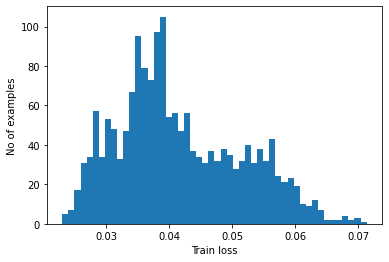

In [ ]:
reconstructions = autoencoder.predict(train_data)
train_loss = tf.keras.losses.mae(reconstructions, train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.05136382


In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats_autoen(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats_autoen(preds, test_labels)

Accuracy = 0.33642691415313225
Precision = 0.22781065088757396
Recall = 0.7549019607843137
